<a href="https://colab.research.google.com/github/diana-arango/Real_estate_team/blob/main/Real_Estate_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

# **Read the CSV file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "https://drive.google.com/file/d/1ouo22BeoUvDlOdNHHj6lddSy3XWaRFy8/view?usp=sharing"


Mounted at /content/drive


In [ ]:
# Show there is access to google drive
!ls "/content/drive/My Drive/housing.csv"

'/content/drive/My Drive/housing.csv'


In [ ]:
#copy file(s) as needed:
!cp "/content/drive/My Drive/housing.csv" "housing.csv"

In [ ]:
#confirm that files were copied
!ls

drive  housing.csv  sample_data


# Cleaning data

In [ ]:
#Read housing.csv file 
housing_df = pd.read_csv("housing.csv")
housing_df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


## Data Selection

In [ ]:
# Columns
housing_df.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [ ]:
# Determine data types for the housing DataFrame
housing_df.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [ ]:
# # Initialize a new dataframe to create a cleaner data file
# Drop the following columns since they dont add value to our analysis: 'id','url','region_url','image_url','description','lat','long','state'
new_clean_housing_df = housing_df.drop(['id', 'url', 'region_url', 'image_url','description'], axis=1)
new_clean_housing_df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384973,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,NaN,39.6269,-119.708,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


In [ ]:
# Determine data types for the housing DataFrame
new_clean_housing_df.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
lat                        float64
long                       float64
state                       object
dtype: object

In [ ]:
# Determine if there are any missing values in the housing data
new_clean_housing_df.count()

region                     384977
price                      384977
type                       384977
sqfeet                     384977
beds                       384977
baths                      384977
cats_allowed               384977
dogs_allowed               384977
smoking_allowed            384977
wheelchair_access          384977
electric_vehicle_charge    384977
comes_furnished            384977
laundry_options            305951
parking_options            244290
lat                        383059
long                       383059
state                      384977
dtype: int64

In [ ]:
# Determine if there are any missing values in the housing data.
# Find null values
for column in new_clean_housing_df.columns:
    print(f"Column {column} has {new_clean_housing_df[column].isnull().sum()} null values")

Column region has 0 null values
Column price has 0 null values
Column type has 0 null values
Column sqfeet has 0 null values
Column beds has 0 null values
Column baths has 0 null values
Column cats_allowed has 0 null values
Column dogs_allowed has 0 null values
Column smoking_allowed has 0 null values
Column wheelchair_access has 0 null values
Column electric_vehicle_charge has 0 null values
Column comes_furnished has 0 null values
Column laundry_options has 79026 null values
Column parking_options has 140687 null values
Column lat has 1918 null values
Column long has 1918 null values
Column state has 0 null values


In [ ]:
#Determine the amount of  missing values in the housing data
new_clean_housing_df.isnull().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64

In [ ]:
# Drop the null rows 
new_clean_housing_df = new_clean_housing_df.dropna()
new_clean_housing_df

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
6,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5118,-119.802,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,sacramento,1960,apartment,1198,2,2.0,1,1,1,0,0,0,w/d in unit,carport,38.4962,-121.530,ca
384972,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
384974,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,ca
384975,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,ca


In [ ]:
# Confim there are no missing values in the housing data after cleaning data
for column in new_clean_housing_df.columns:
    print(f"Column {column} has {new_clean_housing_df[column].isnull().sum()} null values")

Column region has 0 null values
Column price has 0 null values
Column type has 0 null values
Column sqfeet has 0 null values
Column beds has 0 null values
Column baths has 0 null values
Column cats_allowed has 0 null values
Column dogs_allowed has 0 null values
Column smoking_allowed has 0 null values
Column wheelchair_access has 0 null values
Column electric_vehicle_charge has 0 null values
Column comes_furnished has 0 null values
Column laundry_options has 0 null values
Column parking_options has 0 null values
Column lat has 0 null values
Column long has 0 null values
Column state has 0 null values


In [ ]:
# Search for duplicates
print(f"Duplicate entries: {new_clean_housing_df.duplicated().sum()}")

Duplicate entries: 108754


In [ ]:
# Remove duplicates
new_clean_housing_df.drop_duplicates()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
6,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5118,-119.802,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384952,reno / tahoe,1600,cottage/cabin,900,2,1.0,1,1,0,0,0,0,w/d hookups,off-street parking,38.9170,-119.987,ca
384965,reno / tahoe,1850,apartment,1090,2,2.0,1,1,0,0,0,0,w/d in unit,attached garage,39.4036,-119.750,ca
384967,reno / tahoe,1149,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,39.5473,-119.756,ca
384968,reno / tahoe,1426,apartment,1020,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.5287,-119.804,ca


In [ ]:
# Confirm there are no duplicates. NEED A FIX?
print(f"Duplicate entries: {new_clean_housing_df.drop_duplicates().sum()}")

Duplicate entries: region                     reno / tahoereno / tahoereno / tahoereno / tah...
price                                                             3030813495
type                       apartmentcondoapartmentapartmentapartmentapart...
sqfeet                                                             158054744
beds                                                                  254235
baths                                                                 190689
cats_allowed                                                           90470
dogs_allowed                                                           86721
smoking_allowed                                                        74700
wheelchair_access                                                      12922
electric_vehicle_charge                                                 3166
comes_furnished                                                         8628
laundry_options            w/d in unitw/d hookupsw/d in u

In [ ]:
# Remove the index 

In [ ]:
## Preprocessed dataframe is Saved in a new CSV file 
output_file_path = "<file path>new_clean_housing.csv"
new_clean_housing_df.to_csv(output_file_path, index=False)


In [ ]:
# categorize the data frame into region? state? type of housing?

## Machine learning Module

In [42]:
region_counts=new_clean_housing_df.region.value_counts()

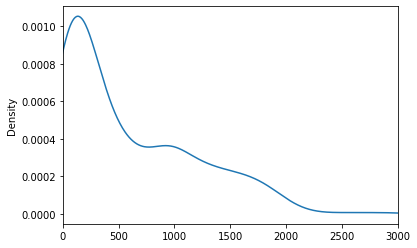

In [43]:

region_counts.plot.density(xlim=[0,3000])


In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_type = pd.DataFrame(enc.fit_transform(new_clean_housing_df.type.values.reshape(-1,1)))

# Rename encoded columns
encode_df_type.columns = enc.get_feature_names(['type'])
encode_df_type.head()

,type_apartment,type_assisted living,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_region = pd.DataFrame(enc.fit_transform(new_clean_housing_df.region.values.reshape(-1,1)))

# Rename encoded columns
encode_df_region.columns = enc.get_feature_names(['region'])
encode_df_region.head()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,region_annapolis,region_appleton-oshkosh-FDL,region_asheville,region_ashtabula,region_athens,region_atlanta,region_auburn,region_augusta,region_austin,region_bakersfield,region_baltimore,region_baton rouge,region_battle creek,region_beaumont / port arthur,region_bellingham,region_bemidji,region_bend,region_billings,region_binghamton,region_birmingham,region_bismarck,region_bloomington,region_bloomington-normal,region_boise,region_boone,region_boston,region_boulder,region_bowling green,region_bozeman,region_brainerd,...,region_tucson,region_tulsa,region_tuscaloosa,region_tuscarawas co,region_twin falls,region_twin tiers NY/PA,region_tyler / east TX,region_upper peninsula,region_utica-rome-oneida,region_valdosta,region_ventura county,region_vermont,region_victoria,region_visalia-tulare,region_waco,"region_washington, DC",region_waterloo / cedar falls,region_watertown,region_wausau,region_wenatchee,region_west virginia (old),region_western IL,region_western KY,region_western maryland,region_western massachusetts,region_western slope,region_wichita,region_wichita falls,region_williamsport,region_wilmington,region_winchester,region_winston-salem,region_worcester / central MA,region_wyoming,region_yakima,region_york,region_youngstown,region_yuba-sutter,region_yuma,region_zanesville / cambridge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_laundry = pd.DataFrame(enc.fit_transform(new_clean_housing_df.laundry_options.values.reshape(-1,1)))

# Rename encoded columns
encode_df_laundry.columns = enc.get_feature_names(['laundry_options'])
encode_df_laundry.head()

,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [47]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_parking = pd.DataFrame(enc.fit_transform(new_clean_housing_df.parking_options.values.reshape(-1,1)))

# Rename encoded columns
encode_df_parking.columns = enc.get_feature_names(['parking_options'])
encode_df_parking.head()

,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
new_clean_housing_df=new_clean_housing_df.merge(encode_df_region,left_index=True,right_index=True).drop("region",1)

In [49]:
new_clean_housing_df=new_clean_housing_df.merge(encode_df_type,left_index=True,right_index=True).drop("type",1)

In [50]:
new_clean_housing_df=new_clean_housing_df.merge(encode_df_laundry,left_index=True,right_index=True).drop("laundry_options",1)

In [51]:
new_clean_housing_df=new_clean_housing_df.merge(encode_df_parking,left_index=True,right_index=True).drop("parking_options",1)

In [52]:
new_clean_housing_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,region_annapolis,region_appleton-oshkosh-FDL,region_asheville,region_ashtabula,region_athens,region_atlanta,region_auburn,region_augusta,region_austin,region_bakersfield,region_baltimore,region_baton rouge,region_battle creek,region_beaumont / port arthur,region_bellingham,region_bemidji,region_bend,...,region_western massachusetts,region_western slope,region_wichita,region_wichita falls,region_williamsport,region_wilmington,region_winchester,region_winston-salem,region_worcester / central MA,region_wyoming,region_yakima,region_york,region_youngstown,region_yuba-sutter,region_yuma,region_zanesville / cambridge,type_apartment,type_assisted living,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1148,1078,3,2.0,1,1,0,0,0,0,39.5483,-119.7960,ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1200,1001,2,2.0,0,0,0,0,0,0,39.5026,-119.7890,ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1813,1683,2,2.0,1,1,1,0,0,0,39.6269,-119.7080,ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1095,708,1,1.0,1,1,1,0,0,0,39.4477,-119.7710,ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,935,661,1,1.0,1,1,1,0,0,0,39.5118,-119.8020,ca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235956,595,1170,3,2.0,1,1,1,0,0,0,35.5115,-98.9795,ok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
235959,850,1600,4,2.0,1,1,1,0,0,0,36.1308,-96.9713,ok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [53]:
# Create our features
from sklearn.model_selection import train_test_split
y = new_clean_housing_df['price']
#X_with_dummies = pd.get_dummies(df)
#X_with_dummies

X=new_clean_housing_df.drop(columns="price")
#X=pd.get_dummies(X)

# Create our target

In [ ]:
X

In [ ]:
# Check the balance of our target values
price_counts=y.value_counts()

In [54]:
# Determine which values to replace
replace_price = list(price_counts[price_counts < 500].index)

# Replace in DataFrame
for price in replace_price:
    new_clean_housing_df.price= new_clean_housing_df.price.replace(price,"Other")


# Check to make sure binning was successful
new_clean_housing_df.price.value_counts()

NameError: ignored

In [55]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=1)
#Figure out how to fix stratify

In [ ]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=1)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
#Counter(y_resampled)

In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:

y_pred = model.predict(X_test)
print(y_pred.shape)

In [ ]:
from sklearn import metrics

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))